<a href="https://colab.research.google.com/github/joyboy129/federated/blob/main/Third_Scenario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@test {"skip": true}

!pip install --quiet --upgrade tensorflow-federated
import nest_asyncio
nest_asyncio.apply()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.4/114.4 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
L=[]

In [ ]:
%load_ext tensorboard

In [ ]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

b'Hello, World!'

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import MinMaxScaler


Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/BigData_1.csv", sep=';', encoding='latin-1')
df2 = pd.read_csv("/content/drive/MyDrive/BigData.csv", sep=',', encoding='latin-1')
df2.rename(columns={"ElectronÃ©gativitÃ©": "Electronégativité"}, inplace=True)
df1.rename(columns={"ï»¿Alloy":"Alloy"}, inplace=True)

df=pd.concat([ df2,df1[["Alloy"]]], axis=1)

df.drop("Unnamed: 0", axis=1, inplace=True)
df = df.dropna(subset=["Etat d'entropie"])


In [ ]:
df.head()


,Etat d'entropie,A,delta,TM,DELTA_TM,Electronégativité,Delta_Electro-,SID,VEC,Delta VEC,K,Delta K,Alloy
0,0,1.70,0.128876,1556.39,0.692971,2.002,0.243590,13.380867,4.0,1.897367,110.2,105.243337,Ag-Al-Ge-Te-W
1,0,1.66,0.118048,1028.02,0.269873,2.056,0.305195,13.380867,3.0,1.788854,89.8,71.134802,Ag-Al-As-Au-Bi
2,0,1.68,0.147734,1456.45,0.700721,2.078,0.160175,13.380867,4.4,1.959592,116.0,129.602469,Ag-As-Pb-Re-Sb
3,0,1.74,0.187466,1449.87,0.196955,1.822,0.319900,13.380867,3.8,2.993326,96.6,59.172967,Ag-As-Co-Cu-Y
4,0,1.78,0.096655,1655.41,0.224371,1.804,0.175795,13.380867,4.8,2.638181,110.0,62.609903,Ag-Co-Cr-Ge-Ti


In [ ]:
df.dtypes
# df=df.iloc[:50000]
# Run for small data
# df.rename(columns={"ElectronÃ©gativitÃ©": "Electronégativité"}, inplace=True)

# df.columns
# df.drop(['Alloy', 'Longue Phase', 'Ag', 'Al', 'Cd', 'Ga', 'Mg', 'Pt', 'Sb',
#        'Sn', 'Ti', 'Zn', 'Zr', 'B', 'Ca', 'Ce', 'Co', 'Cr', 'Cu', 'Er', 'Fe',
#        'In', 'La', 'Li', 'Mn', 'Mo', 'Nd', 'Ni', 'Re', 'Ru', 'Sm', 'V', 'Yb',
#        'Au', 'Be', 'Bi', 'Pb', 'Nb', 'Si', 'Dy', 'Ge', 'Hf', 'W', 'Pd', 'Sr',
#        'Na', 'Y', 'Ta', 'Gd', 'Rh', 'P', 'C', 'Ho', 'Pr', 'N', 'Tb', 'Sc',
#        'Tm', 'Lu', 'Ir', 'Os', 'As', 'Tc'], axis=1, inplace=True)
# df["Etat d'entropie"] = df["Etat d'entropie"].map({'H': 1, 'L': 0})
# df["Etat d'entropie"].value_counts()


Etat d'entropie        int64
A                    float64
delta                float64
TM                   float64
DELTA_TM             float64
Electronégativité    float64
Delta_Electro-       float64
SID                  float64
VEC                  float64
Delta VEC            float64
K                    float64
Delta K              float64
Alloy                 object
dtype: object

In [ ]:
# import random
# client1 = int((client1/100) *df.shape[0])
# client2 = int((client2/100) *df.shape[0])
# client3 = int((client3/100) *df.shape[0])
# client4 = df.shape[0] - client1 - client2 - client3
# my_list = [1] * client1 + [2] * client2 + [3] * client3 + [4] * client4
# random.shuffle(my_list)
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

num_rows_with_0 = 6000
df_ones = df[df['Etat d\'entropie'] == 0]
df_zeros = df[df['Etat d\'entropie'] == 1]

# If the number of rows with binary classification 1 is greater than 30,000, randomly sample the rows
df_ones = df_ones.sample(n=num_rows_with_0, replace=False)


# Concatenate the undersampled rows with binary classification 0
df = pd.concat([df_zeros, df_ones])



client_distributions = {
    1: {'percentage': 0.4, 'distribution': [0.2, 0.8]},
    2: {'percentage': 0.3, 'distribution': [0.7, 0.3]},
    3: {'percentage': 0.25, 'distribution': [0.55, 0.45]},
    4: {'percentage': 0.15, 'distribution': [0.2, 0.8]},
}
sampled_dfs = []

# For each 'id', sample the data and calculate the binary class distribution
total_rows = len(df)
num_rows_per_id = {id_: int(total_rows * dist_info['percentage']) for id_, dist_info in client_distributions.items()}

# Create an empty list to store the sampled DataFrames
sampled_dfs = []

# For each 'id', sample the same number of rows for both binary classes
for id_, dist_info in client_distributions.items():
    num_rows = num_rows_per_id[id_]

    # Calculate the number of 0s and 1s based on the distribution
    num_zeros = int(num_rows * dist_info['distribution'][0])
    num_ones = int(num_rows * dist_info['distribution'][1])

    # Sample the data for class 0
    sampled_df_0 = df[df['Etat d\'entropie'] == 0].sample(n=num_zeros,replace=True)

    # Sample the data for class 1
    sampled_df_1 = df[df['Etat d\'entropie'] == 1].sample(n=num_ones, replace=True)

    # Concatenate the two sampled DataFrames
    sampled_df = pd.concat([sampled_df_0, sampled_df_1])

    # Assign the 'id' to the rows
    sampled_df['id'] = id_

    # Shuffle the rows to avoid grouping rows with the same 'id' together
    sampled_df = sampled_df.sample(frac=1).reset_index(drop=True)

    # Add the sampled DataFrame to the list
    sampled_dfs.append(sampled_df)


# Concatenate all sampled DataFrames into the final DataFrame
df = pd.concat(sampled_dfs)

# Reset the index of the final DataFrame
df.reset_index(drop=True, inplace=True)


# df =distribute_dataframe(df, client_distributions)
# Create a copy of the data excluding the specified column

# Prepare the 'id' column
# ids = np.random.choice([1,2,3,4], size=len(df), p=list(id_percentages.values()))
# df['id'] = ids

# # Prepare the "Etat d'entropie" column
# for id_val, percentages in entropy_percentages.items():
#     size = len(df[df['id'] == id_val])
#     entropy_values = np.random.choice([0,1], size=size, p=list(percentages.values()))
#     df.loc[df['id'] == id_val, 'Etat d\'entropie'] = entropy_values
df.head()

,Etat d'entropie,A,delta,TM,DELTA_TM,Electronégativité,Delta_Electro-,SID,VEC,Delta VEC,K,Delta K,Alloy,id
0,0,1.82,0.131868,1446.400,0.552844,1.900,0.298463,13.380867,4.0,1.673320,98.2,42.719551,Ag-Nb-Pb-Te-Ti,1
1,1,1.78,0.143890,2388.950,0.362316,2.252,0.073321,13.380867,7.2,1.939072,234.4,120.055987,As-Mo-Pt-Rh-W,1
2,1,1.92,0.060739,2263.466,0.260434,2.140,0.303051,13.380867,4.0,3.033150,204.0,24.166092,Au-Mo-Nb-Pd-Ru,1
3,1,1.82,0.094531,2444.350,0.252202,2.132,0.117030,13.380867,5.2,2.993326,146.0,86.162637,Mo-Os-Pd-Ru-Si,1
4,1,1.90,0.033287,2657.750,0.207483,2.140,0.247225,13.380867,7.6,1.356466,278.0,78.076885,Cr-Ir-Rh-Ru-W,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file into a DataFrame

# Function to extract elements from the alloy formula
def extract_elements(alloy):
    return alloy.split('-')

# Apply the element extraction function to the 'Alloy' column and create a new column 'Elements'
df['Elements'] = df['Alloy'].apply(extract_elements)

# Create a dictionary to store element frequencies
element_frequencies = {}

# Count the occurrence of each element in the DataFrame
for elements in df['Elements']:
    for element in elements:
        element_frequencies[element] = element_frequencies.get(element, 0) + 1

# Plot the periodic table heatmap
print(element_frequencies)

{'Ag': 2203, 'Nb': 8182, 'Pb': 2199, 'Te': 2582, 'Ti': 7068, 'As': 3881, 'Mo': 7656, 'Pt': 7009, 'Rh': 7053, 'W': 6692, 'Au': 3092, 'Pd': 6349, 'Ru': 7039, 'Os': 7604, 'Si': 4699, 'Cr': 5670, 'Ir': 7532, 'Fe': 6799, 'V': 7648, 'Co': 5511, 'Re': 7509, 'Hf': 4592, 'Zr': 4339, 'Cu': 3310, 'Zn': 5207, 'Al': 5502, 'Sc': 3420, 'Ta': 7914, 'Ni': 6851, 'Ga': 4542, 'Mn': 6090, 'Ge': 4017, 'Mg': 2807, 'Sn': 2346, 'Hg': 2096, 'Y': 2391, 'Bi': 2378, 'Cd': 2429, 'In': 2391, 'Sb': 2491}


In [ ]:
freq = pd.DataFrame(list(element_frequencies.items()))

# Saving the DataFrame as a CSV file
csv_filename = 'element_frequencies.csv'
freq.to_csv("/content/drive/MyDrive/"+csv_filename, index=False, header=False)

print(f'Element frequencies saved to {csv_filename}')
df.drop("Alloy", axis=1, inplace=True)

Element frequencies saved to element_frequencies.csv


In [ ]:
freq.head()

,0,1
0,Ag,2203
1,Nb,8182
2,Pb,2199
3,Te,2582
4,Ti,7068


In [ ]:
df.shape

(39818, 14)

In [ ]:
df[["Etat d'entropie", "id"]].value_counts()

Etat d'entropie  id
1                1     11584
0                2      7601
                 3      4977
1                4      4344
                 3      4072
                 2      3258
0                1      2896
                 4      1086
dtype: int64

In [ ]:

def normalize_columns(df, columns_to_normalize):
    # Create a copy of the original dataframe
    normalized_df = df.copy()

    # Select the columns to normalize
    data_to_normalize = normalized_df[columns_to_normalize]

    # Create an instance of the scaler
    scaler = StandardScaler()

    # Fit the scaler to the selected columns
    scaler.fit(data_to_normalize)

    # Normalize the selected columns
    normalized_data = scaler.transform(data_to_normalize)

    # Update the normalized values in the dataframe
    normalized_df[columns_to_normalize] = normalized_data

    return normalized_df
df1=normalize_columns(df,['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])
df1.head()

,Etat d'entropie,A,delta,TM,DELTA_TM,Electronégativité,Delta_Electro-,SID,VEC,Delta VEC,K,Delta K,id,Elements
0,0,-0.210038,1.059246,-1.183830,1.012077,0.128934,0.297017,-3.552714e-15,-1.127485,-0.768244,-1.079808,-1.532682,1,"[Ag, Nb, Pb, Te, Ti]"
1,1,-0.622136,1.405193,0.898342,-0.225416,2.580643,-2.677172,-3.552714e-15,1.321034,-0.385112,1.627578,1.018015,1,"[As, Mo, Pt, Rh, W]"
2,1,0.820205,-0.987526,0.621137,-0.887139,1.800554,0.357631,-3.552714e-15,-1.127485,1.192209,1.023286,-2.144609,1,"[Au, Mo, Nb, Pd, Ru]"
3,1,-0.210038,-0.015147,1.020725,-0.940609,1.744833,-2.099766,-3.552714e-15,-0.209291,1.134795,-0.129639,-0.099850,1,"[Mo, Os, Pd, Ru, Si]"
4,1,0.614156,-1.777469,1.492144,-1.231061,1.800554,-0.379855,-3.552714e-15,1.627099,-1.225049,2.494259,-0.366533,1,"[Cr, Ir, Rh, Ru, W]"


In [ ]:
# Run for Bigdata only
NUM_CLIENTS = 5

data = pd.read_csv("/content/drive/MyDrive/first_file.csv", sep=',', encoding='latin-1')

data.rename(columns={"ElectronÃ©gativitÃ©": "Electronégativité"}, inplace=True)
data.drop(['Alloy', 'Longue Phase', 'Ag', 'Al', 'Cd', 'Ga', 'Mg', 'Pt', 'Sb',
       'Sn', 'Ti', 'Zn', 'Zr', 'B', 'Ca', 'Ce', 'Co', 'Cr', 'Cu', 'Er', 'Fe',
       'In', 'La', 'Li', 'Mn', 'Mo', 'Nd', 'Ni', 'Re', 'Ru', 'Sm', 'V', 'Yb',
       'Au', 'Be', 'Bi', 'Pb', 'Nb', 'Si', 'Dy', 'Ge', 'Hf', 'W', 'Pd', 'Sr',
       'Na', 'Y', 'Ta', 'Gd', 'Rh', 'P', 'C', 'Ho', 'Pr', 'N', 'Tb', 'Sc',
       'Tm', 'Lu', 'Ir', 'Os', 'As', 'Tc'], axis=1, inplace=True)
data["Etat d'entropie"] = data["Etat d'entropie"].map({'H': 1, 'L': 0})
data["Etat d'entropie"].value_counts()

data=normalize_columns(data,['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])
data["id"]=NUM_CLIENTS

df = pd.concat([df1, data], ignore_index=True)



In [ ]:
for id in range(1,NUM_CLIENTS+1):
  df[df["id"]==id].drop_duplicates(subset=['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])


# df=df.drop_duplicates(subset=['A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité', 'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K'])

In [ ]:
df.columns

Index(['Etat d'entropie', 'A', 'delta', 'TM', 'DELTA_TM', 'Electronégativité',
       'Delta_Electro-', 'SID', 'VEC', 'Delta VEC', 'K', 'Delta K', 'id',
       'Elements'],
      dtype='object')

In [ ]:
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt


def pair_plot(df):
  etat_entropie_values = [0, 1]

# Plotting the density plots
  id_values = range(1,NUM_CLIENTS+1)

# Plotting the density plots
  num_rows = 11
  num_cols = NUM_CLIENTS
  num_plots = num_rows * num_cols

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 36))
  axes = axes.flatten()

  for i, col in enumerate(df.columns):
    if col != 'id' and col != 'Etat d\'entropie':
        for j, id_value in enumerate(id_values):
            ax = axes[(i * len(id_values)) + j]
            for etat_entropie in [0, 1]:
                filtered_data = df[df['Etat d\'entropie'] == etat_entropie]
                if not filtered_data.empty:
                    filtered_data[col].plot(kind='density', label=f'Etat Entropie = {etat_entropie}', ax=ax)
            filtered_data = df[(df['Etat d\'entropie'] == 0) | (df['Etat d\'entropie'] == 1)]
            if not filtered_data.empty:
                filtered_data[col].plot(kind='density', label='All Data', ax=ax, linestyle='--')
            ax.set_title(f'Density Plot - {col}, id = {id_value}')
            ax.legend()

  plt.tight_layout()
  plt.show()
# pair_plot(df)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
import nest_asyncio
nest_asyncio.apply()
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import collections
import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
np.random.seed(0)
tff.federated_computation(lambda: 'Hello, World!')()

b'Hello, World!'

In [ ]:
df.dtypes

Etat d'entropie        int64
A                    float64
delta                float64
TM                   float64
DELTA_TM             float64
Electronégativité    float64
Delta_Electro-       float64
SID                  float64
VEC                  float64
Delta VEC            float64
K                    float64
Delta K              float64
id                     int64
Elements              object
dtype: object

In [ ]:
# split client id into train and test clients
client_id_colname = 'id' # the column that represents client ID
client_ids = df[client_id_colname].unique()
train_client_ids = range(1,NUM_CLIENTS)
test_client_ids = [NUM_CLIENTS]
print(client_ids)

[1 2 3 4 5]


In [ ]:
def create_tf_dataset_for_client_fn(client_id):
  # a function which takes a client_id and returns a
  # tf.data.Dataset for that client
    client_data = df[df[client_id_colname] == client_id]
    client_data = client_data.drop(columns=["id"])
    dataset = tf.data.Dataset.from_tensor_slices(client_data.to_dict('list'))
    dataset = dataset.shuffle(SHUFFLE_BUFFER).batch(1).repeat(NUM_EPOCHS)
    return dataset

In [ ]:
NUM_EPOCHS =5
BATCH_SIZE = 256
SHUFFLE_BUFFER = 500
PREFETCH_BUFFER = 500



train_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=train_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )

#
test_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
        client_ids=test_client_ids,
        serializable_dataset_fn=create_tf_dataset_for_client_fn
    )

In [ ]:
train_data.element_type_structure

{"Etat d'entropie": TensorSpec(shape=(None,), dtype=tf.int32, name=None),
 'A': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'delta': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'TM': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'DELTA_TM': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'Electronégativité': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'Delta_Electro-': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'SID': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'VEC': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'Delta VEC': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'K': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'Delta K': TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 'Elements': TensorSpec(shape=(None, 5), dtype=tf.string, name=None)}

In [ ]:
example_dataset = train_data.create_tf_dataset_for_client(
    train_data.client_ids[0])

example_element = next(iter(example_dataset))


In [ ]:

def preprocess(dataset):

        def batch_format_fn(element):
            output = tf.concat([
                tf.expand_dims(element['Electronégativité'],1)
                ,tf.expand_dims(element['Delta_Electro-'],1)
                ,tf.expand_dims(element['SID'],1)
                ,tf.expand_dims(element['VEC'],1)
                ,tf.expand_dims(element['Delta VEC'],1)
                ,tf.expand_dims(element[ 'K'],1)
                ,tf.expand_dims(element['Delta K'],1)
                ,tf.expand_dims(element['A'],1)
                ,tf.expand_dims(element['delta'],1)
                ,tf.expand_dims(element['TM'],1)
                ,tf.expand_dims(element['DELTA_TM'],1)], axis=1)
            return collections.OrderedDict(x= tf.reshape(output, [1, 11] )
                                           ,
                                           y= tf.reshape(element["Etat d'entropie"], [1,1]) )

        return dataset.map(batch_format_fn)

In [ ]:

preprocessed_example_dataset = preprocess(example_dataset)

sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

sample_batch

OrderedDict([('x',
              array([[-3.1683168e-01,  2.3958997e-01, -3.5527137e-15, -1.8926474e+00,
                      -1.1417950e+00, -2.2088792e+00, -1.2253789e+00, -2.2705250e+00,
                       1.3770257e+00, -2.1644821e+00, -5.0600928e-01]], dtype=float32)),
             ('y', array([[0]], dtype=int32))])

In [ ]:
def make_federated_data(client_data, client_ids):
    return [
      preprocess(client_data.create_tf_dataset_for_client(x))
      for x in client_ids
  ]

In [ ]:
sample_clients = train_data.client_ids[0:NUM_CLIENTS]
# sample_clients_test=test_data.client_ids[0:NUM_CLIENTS]
federated_train_data = make_federated_data(train_data, sample_clients)

print('Number of client datasets: {l}'.format(l=len(federated_train_data)))
print('First dataset: {d}'.format(d=federated_train_data[0]))

Number of client datasets: 4
First dataset: <_MapDataset element_spec=OrderedDict([('x', TensorSpec(shape=(1, 11), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(1, 1), dtype=tf.int32, name=None))])>


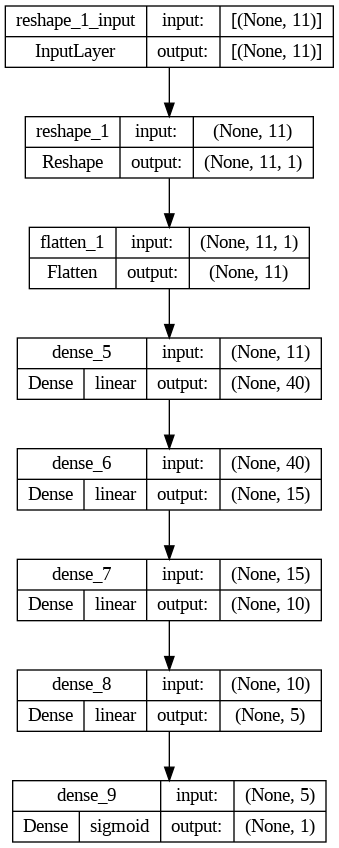

In [ ]:

def create_keras_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Reshape(target_shape=(11, 1), input_shape=(11,)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(40, kernel_initializer='glorot_uniform'),
        tf.keras.layers.Dense(15, kernel_initializer='glorot_uniform'),
        tf.keras.layers.Dense(10, kernel_initializer='glorot_uniform'),
        tf.keras.layers.Dense(5, kernel_initializer='glorot_uniform'),
        tf.keras.layers.Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid')
    ])

# RNN
# def create_keras_model():
#     return tf.keras.models.Sequential([
#         tf.keras.layers.Reshape(target_shape=(11, 1), input_shape=(11,)),
#         tf.keras.layers.SimpleRNN(32),
#         tf.keras.layers.Dense(85, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(60, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(25, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(10, kernel_initializer='zeros'),
#         tf.keras.layers.Softmax(),
#     ])
# def create_keras_model():
#     return tf.keras.models.Sequential([
#         tf.keras.layers.Reshape(target_shape=(11, 1), input_shape=(11,)),
#         tf.keras.layers.LSTM(32),
#         tf.keras.layers.Dense(85, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(60, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(25, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(10, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(32, kernel_initializer='lecun_normal',activation='selu'),
#     ])
# def create_keras_model():
#     return tf.keras.models.Sequential([
#         tf.keras.layers.Reshape(target_shape=(11, 1), input_shape=(11,)),
#         tf.keras.layers.GRU(32),
#         tf.keras.layers.Dense(30, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(25, kernel_initializer='zeros'),
#         tf.keras.layers.Dense(1, kernel_initializer='zeros'),
#         tf.keras.layers.Softmax(),
#     ])

model=create_keras_model()
tf.keras.utils.plot_model(
model,
to_file="model_ann.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
def model_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
    keras_model = create_keras_model()
    return tff.learning.models.from_keras_model(
    keras_model=keras_model,
    input_spec=preprocessed_example_dataset.element_spec,
    loss=tf.keras.losses.Poisson(reduction="auto", name="poisson"),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.FalseNegatives()
    ]
)

In [ ]:
iterative_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(),
    server_optimizer_fn=lambda: tf.keras.optimizers.Adam())



In [ ]:
str(iterative_process.initialize.type_signature)

'( -> <global_model_weights=<trainable=<float32[11,40],float32[40],float32[40,15],float32[15],float32[15,10],float32[10],float32[10,5],float32[5],float32[5,1],float32[1]>,non_trainable=<>>,distributor=<>,client_work=<>,aggregator=<value_sum_process=<>,weight_sum_process=<>>,finalizer=<int64,float32[11,40],float32[11,40],float32[40],float32[40],float32[40,15],float32[40,15],float32[15],float32[15],float32[15,10],float32[15,10],float32[10],float32[10],float32[10,5],float32[10,5],float32[5],float32[5],float32[5,1],float32[5,1],float32[1],float32[1]>>@SERVER)'

In [ ]:
state = iterative_process.initialize()

In [ ]:
df.dtypes

Etat d'entropie        int64
A                    float64
delta                float64
TM                   float64
DELTA_TM             float64
Electronégativité    float64
Delta_Electro-       float64
SID                  float64
VEC                  float64
Delta VEC            float64
K                    float64
Delta K              float64
id                     int64
Elements              object
dtype: object

In [ ]:
state, metrics = iterative_process.next(state, federated_train_data)
print('round  1, metrics={}'.format(metrics))

round  1, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.4158923), ('true_positives', 103114.0), ('true_negatives', 66762.0), ('false_positives', 16038.0), ('false_negatives', 13176.0), ('loss', 0.7482867), ('num_examples', 199090), ('num_batches', 199090)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])


In [ ]:
NUM_ROUNDS = 10

acc = []

for round_num in range(2, NUM_ROUNDS):
    state, metrics = iterative_process.next(state, federated_train_data)
    print('round {:2d}, metrics={}'.format(round_num, metrics))
    acc.append( metrics['client_work']['train'])

round  2, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.4158923), ('true_positives', 103051.0), ('true_negatives', 66839.0), ('false_positives', 15961.0), ('false_negatives', 13239.0), ('loss', 0.7483216), ('num_examples', 199090), ('num_batches', 199090)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
round  3, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.4158923), ('true_positives', 103159.0), ('true_negatives', 66771.0), ('false_positives', 16029.0), ('false_negatives', 13131.0), ('loss', 0.7482282), ('num_examples', 199090), ('num_batches', 199090)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
round  4, metrics=OrderedDict([('distributor', ()), 

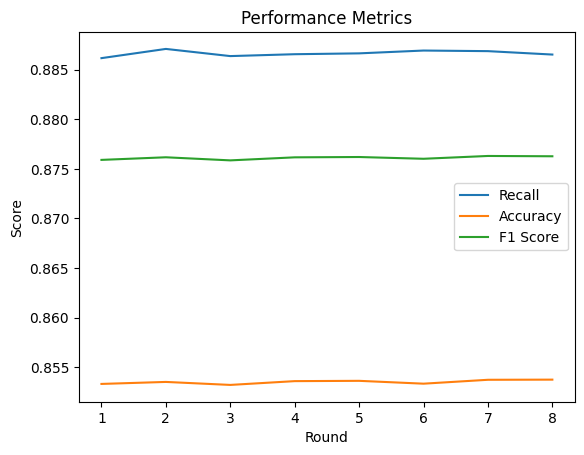

In [ ]:
from matplotlib.animation import FuncAnimation

tp_values = [int(i['true_positives']) for i in acc]  # List of true positives values for each round
tn_values = [int(i['true_negatives']) for i in acc]  # List of true negatives values for each round
fp_values = [int(i['false_positives']) for i in acc]  # List of false positives values for each round
fn_values = [int(i['false_negatives']) for i in acc]

accuracy_values = [(tp + tn) / (tp + tn + fp + fn) for tp, tn, fp, fn in zip(tp_values, tn_values, fp_values, fn_values)]
recall_values = [tp / (tp + fn) if (tp + fn) > 0 else 0 for tp, fn in zip(tp_values, fn_values)]
f1_score_values = [tp/(tp+0.5*(fp+fn))  for tp, fp, fn in zip(tp_values, fp_values, fn_values)]

# Create x-axis values
rounds = np.arange(1, len(tp_values) + 1)

# Plot recall
plt.plot(rounds, recall_values, label='Recall')

# Plot accuracy
plt.plot(rounds, accuracy_values, label='Accuracy')

# Plot F1 score
plt.plot(rounds, f1_score_values, label='F1 Score')

# Set plot title and labels
plt.title('Performance Metrics')
plt.xlabel('Round')
plt.ylabel('Score')

# Add legend
plt.legend()

# Show the plot
plt.show()

Evaluation process

In [ ]:

# Create a model function

# Use this model function to create a training process
evaluation_process = tff.learning.algorithms.build_fed_eval(model_fn)

In [ ]:
print(evaluation_process.next.type_signature.formatted_representation())

(<
  state=<
    global_model_weights=<
      trainable=<
        float32[11,40],
        float32[40],
        float32[40,15],
        float32[15],
        float32[15,10],
        float32[10],
        float32[10,5],
        float32[5],
        float32[5,1],
        float32[1]
      >,
      non_trainable=<>
    >,
    distributor=<>,
    client_work=<
      <>,
      <
        sparse_categorical_accuracy=<
          float32,
          float32
        >,
        true_positives=<
          float32[1]
        >,
        true_negatives=<
          float32[1]
        >,
        false_positives=<
          float32[1]
        >,
        false_negatives=<
          float32[1]
        >,
        loss=<
          float32,
          float32
        >,
        num_examples=<
          int64
        >,
        num_batches=<
          int64
        >
      >
    >,
    aggregator=<
      value_sum_process=<>,
      weight_sum_process=<>
    >,
    finalizer=<>
  >@SERVER,
  client_data={<
    x=floa

In [ ]:
evaluation_state = evaluation_process.initialize()
model_weights = iterative_process.get_model_weights(state)
evaluation_state = evaluation_process.set_model_weights(evaluation_state, model_weights)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
federated_test_data = make_federated_data(test_data, test_data.client_ids)

len(federated_test_data), federated_test_data[0]

(1,
 <_MapDataset element_spec=OrderedDict([('x', TensorSpec(shape=(1, 11), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(1, 1), dtype=tf.int32, name=None))])>)

In [ ]:
evaluation_output = evaluation_process.next(evaluation_state, federated_test_data)

<ipython-input-94-a79d3e099da3>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-94-a79d3e099da3>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


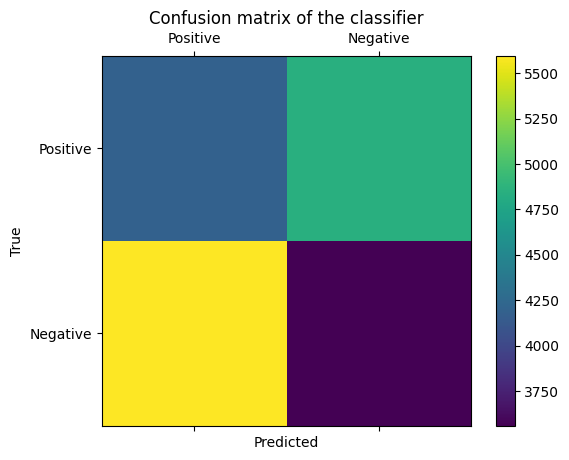

In [ ]:
tp = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['true_positives'])
tn = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['true_negatives'])
fp = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['false_positives'])
fn = int(evaluation_output.metrics["client_work"]["eval"]['total_rounds_metrics']['false_negatives'])

cm = np.array([[tp, fp],
               [fn, tn]])

# labels
labels = ['Positive', 'Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)


table_html = """
<table>
  <tr>
    <th>Metric</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>Precision</td>
    <td>{:.2f}</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>{:.2f}</td>
  </tr>
  <tr>
    <td>F1 Score</td>
    <td>{:.2f}</td>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>{:.2f}</td>
  </tr>
</table>
""".format(precision, recall, f1_score,accuracy)

# Display HTML table in Jupyter Notebook
from IPython.display import display, HTML
display(HTML(table_html))

Precision: 0.4637520752628666
Recall: 0.4282064384261625
F1 score: 0.44527098831030815


Metric,Value
Precision,0.46
Recall,0.43
F1 Score,0.45
Accuracy,0.43


In [ ]:
[precision, recall, f1_score,accuracy]

[0.4637520752628666,
 0.4282064384261625,
 0.44527098831030815,
 0.42605827377680044]

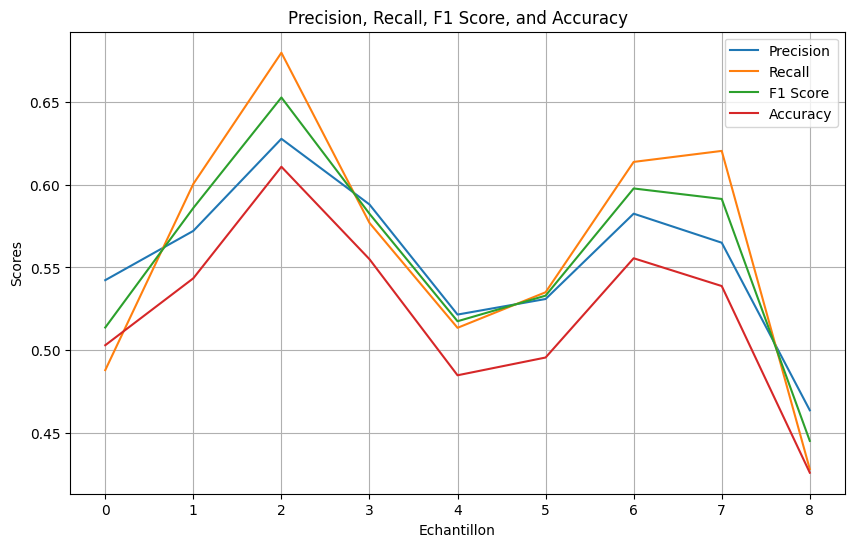

In [ ]:
legends = ['Precision', 'Recall', 'F1 Score', 'Accuracy']

L=[[0.542305508233958, 0.48799182422074605, 0.5137170521785906, 0.503023639362287],
[0.5720545277507303, 0.600408788962698, 0.5858888057840936, 0.5434304562946674],
[0.6276545540349221,
 0.6796116504854369,
 0.6526005888125613,
 0.6107751511819681],
[0.5880208333333333,
 0.5769034236075626,
 0.5824090791849368,
 0.5549752611324904],
[0.521536066424494,
 0.5135411343893714,
 0.5175077239958805,
 0.48488180318856516],
[0.5309330628803245,
 0.5350025549310169,
 0.5329600407228302,
 0.4956019791094008],
[0.5824442289039767,
 0.6136944302503833,
 0.5976611097287884,
 0.5555250137438152],
[0.5649139134481154,
 0.6203372508942259,
 0.5913297613248905,
 0.5387575590984057],
[0.4637520752628666,
 0.4282064384261625,
 0.44527098831030815,
 0.42605827377680044]
]
# Transpose the data to separate the metrics
metrics = list(zip(*L))

# Create the plot
plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    plt.plot(metric, label=legends[i])

plt.xlabel('Echantillon')
plt.ylabel('Scores')
plt.title('Precision, Recall, F1 Score, and Accuracy')
plt.legend()
plt.grid(True)
plt.show()